In [1]:
import darts
from tqdm import tqdm
import pandas as pd
from darts import TimeSeries
from darts.utils.missing_values import fill_missing_values

In [19]:
from darts.models.forecasting.auto_arima import AutoARIMA
from darts.models.forecasting.exponential_smoothing import ExponentialSmoothing

In [2]:
from darts.models.forecasting import auto_arima

In [5]:
df = pd.read_csv("SalesDataAnalysis.csv")

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,8,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.drop(labels=['order_status','currency','ship_phone','phone_number','site','delivered_date','ship_date','ship_address_two','arrival_date','cancelled','description','fulfillment_center','item_id','package_number','price.1','quantity.1','requires_shipping','ship_date.1','shipment_id','sku','tax','title','unfulfillable','common_order_id','product_id.1','status','other_cost','refund','selling_cost'],inplace=True, axis=1)

In [7]:
product_keys=df[df['product_id'].isnull()==False]['product_id']
product_keys = list(set(list(product_keys)))

In [10]:
df['purchase_date'] = df['purchase_date'].map(lambda s : s[:s.index(" ")])

In [11]:
d2=df.copy()
fill=float(0)


In [16]:
data={}
trainable_keys=[]
for key in tqdm(product_keys):
    d1=d2.copy()
    d1=d1.loc[d1['product_id'] == key]
    d1=d1.groupby(['purchase_date','product_id'],as_index=False).agg({'quantity': 'sum'})
    series = TimeSeries.from_dataframe(d1,'purchase_date','quantity',freq='D')
    series=fill_missing_values(series,fill=fill)
    l=len(series)
    l=int(l)
    if l>=31:
        #time_stamp=d1.iloc[len(d1)-5]['purchase_date']
        #train, val = series.split_before(pd.Timestamp(time_stamp))
        trainable_keys.append(key)
        data[key]={
            'train':series,
            'val':series
        }
    

100%|██████████| 129/129 [00:40<00:00,  3.20it/s]


In [20]:
models_aarima={}
for key in tqdm(trainable_keys):
    #print(key)
    train_data = data[key]['train']
    #print(train_data)
    val_data = data[key]['val']
    model_aarima = AutoARIMA()
    #model_aarima.min_train_series_length=4 
    model_aarima.fit(train_data)
    models_aarima[key] = model_aarima

100%|██████████| 111/111 [10:50<00:00,  5.86s/it]


In [21]:
def predict(product_key,num):
    model=models_aarima[product_key]
    prediction = model.predict(num)
    return prediction

In [37]:
prediction=predict(trainable_keys[27],500)

In [35]:
import matplotlib.pyplot as plt

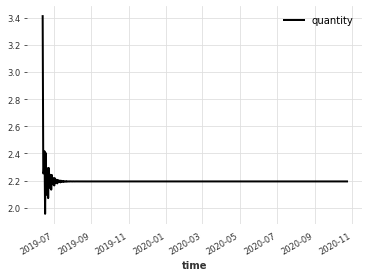

In [38]:
prediction.plot()